# Multiclass Classification using SoftMax regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
data = np.array(data)
m,n = data.shape
np.random.shuffle(data) # shuffle the data before splitting into train and test sets

In [3]:
m,n

(42000, 785)

In [ ]:
# Spliting the data for training and testing purposes
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[0:n]
X_dev = X_dev/255

data_train = data[1000:m].T 
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255

In [ ]:
# Now we initialize the parameters of the model
# We chose a normal distribution of random parameters between -0.5 to 0.5
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1)  - 0.5
    W2 = np.random.rand(10,10)  - 0.5
    b2 = np.random.rand(10,1)  - 0.5
    return W1, b1, W2, b2 

#Defining the activation functions
def relu(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z)/ sum(np.exp(Z))
    return A

#Forward Propagation
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

#Defining the derivative of the activation function
def relu_deriv(Z):
    return Z > 0

# Matching the matrix of X and Y
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T 
    return one_hot_Y

#Back Propagation
def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

#updating parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0: #Get the acccuracy every 50 iterations
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ",get_accuracy(predictions, Y))
    return W1, b1, W2, b2 

In [7]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.1,500)

Iteration:  0
[8 0 7 ... 8 8 0] [0 1 3 ... 9 3 7]
Accuracy:  0.13631707317073172
Iteration:  10
[7 7 6 ... 8 8 0] [0 1 3 ... 9 3 7]
Accuracy:  0.24690243902439024
Iteration:  20
[7 7 6 ... 9 8 0] [0 1 3 ... 9 3 7]
Accuracy:  0.3241707317073171
Iteration:  30
[7 7 6 ... 9 8 3] [0 1 3 ... 9 3 7]
Accuracy:  0.38221951219512196
Iteration:  40
[7 1 6 ... 9 8 3] [0 1 3 ... 9 3 7]
Accuracy:  0.4292682926829268
Iteration:  50
[0 1 6 ... 9 8 4] [0 1 3 ... 9 3 7]
Accuracy:  0.47197560975609754
Iteration:  60
[0 1 6 ... 9 8 4] [0 1 3 ... 9 3 7]
Accuracy:  0.5120487804878049
Iteration:  70
[0 3 6 ... 9 3 4] [0 1 3 ... 9 3 7]
Accuracy:  0.5507317073170732
Iteration:  80
[0 3 6 ... 7 3 4] [0 1 3 ... 9 3 7]
Accuracy:  0.5828536585365853
Iteration:  90
[0 3 6 ... 7 3 4] [0 1 3 ... 9 3 7]
Accuracy:  0.6103414634146341
Iteration:  100
[0 3 6 ... 7 3 4] [0 1 3 ... 9 3 7]
Accuracy:  0.6350487804878049
Iteration:  110
[0 3 6 ... 7 3 4] [0 1 3 ... 9 3 7]
Accuracy:  0.6568780487804878
Iteration:  120
[0 3 2 

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    Z1,A1,Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


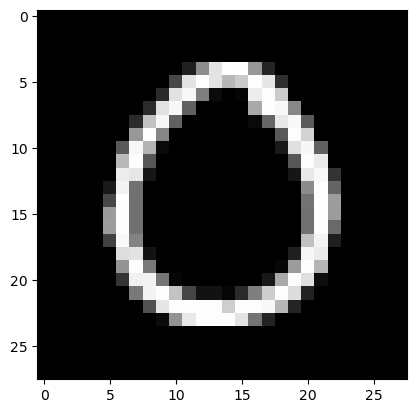

Prediction:  [5]
Label:  1


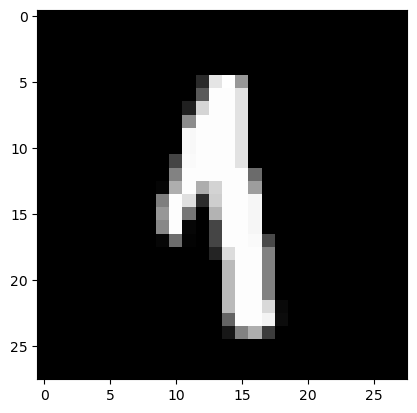

Prediction:  [2]
Label:  3


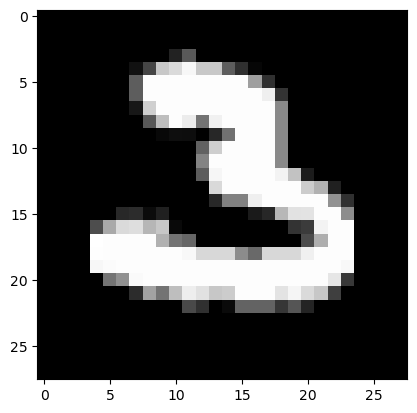

Prediction:  [6]
Label:  2


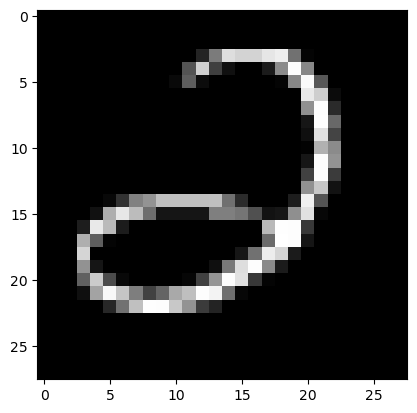

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

ValueError: shapes (10,784) and (785,1000) not aligned: 784 (dim 1) != 785 (dim 0)